# Introduction to Tethne: Time and Change, Working with Corpora

In this workbook we'll start to analyze our data diachronically. To do that, we'll make use of a special object called a ``Corpus`` that provides some handy methods for organizing and indexing our ``Paper``s. We'll use the ``slice`` method to index our ``Paper``s temporally and across journals, and plot the distribution of **features** across those slice axes.

## Before you start

* Download the Web of Science practice dataset from [here](http://devo-evo.lab.asu.edu/methods/tethne/datasets.zip), and store it in a place where you can find it. You'll need the full path to your dataset.
* Complete the tutorial **"Simple Networks"**

## Loading our WoS data

We'll use the Web of Science dataset that we used in our last workbook. Since this is a new workbook, we'll have to load it again. 

In [3]:
from tethne.readers import wos
datadirpath = '/Users/erickpeirson/Downloads/datasets/wos'
MyCorpus = wos.read(datadirpath)

Think of a ``Corpus`` as a container for your ``Paper``s. Your ``Paper``s are still here; you can get a list of all of your papers using the **``all_papers``** method. That means it's easy to generate a simple network like we did in the previous notebook.

In [4]:
from tethne.networks import authors
cg = authors.coauthors(MyCorpus.all_papers())
print 'This graph has {0} nodes and {1} edges, just like before!'.format(len(cg.nodes()), len(cg.edges()))

AttributeError: Corpus has no such attribute

Your ``Paper``s are also indexed. For WoS datasets, they are indexed by ``wosid`` (``UT`` in the original field-tagged data file).

In [ ]:
MyCorpus.papers.keys()[0:10]   # The first 10 keys in the Paper index.

So if you know the wosid of a Paper, you can retrieve it from ``Corpus.papers``:

In [ ]:
MyCorpus.papers['WOS:000305886800001']

## Indexing by time: slices

Often we're interested in how networks evolve over time. In Tethne, the first step to diachronic analysis is indexing, or "slicing," your ``Corpus`` by publication date. We can do this using the ``slice`` method.

In [6]:
MyCorpus.slice('date')

The default behavior is to divide your ``Paper``s up into 1-year time-periods. You can visualize the distribution of ``Paper``s over time using the ``plot_distribution`` method.

In [9]:
MyCorpus.axes['date'].keys()

[1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

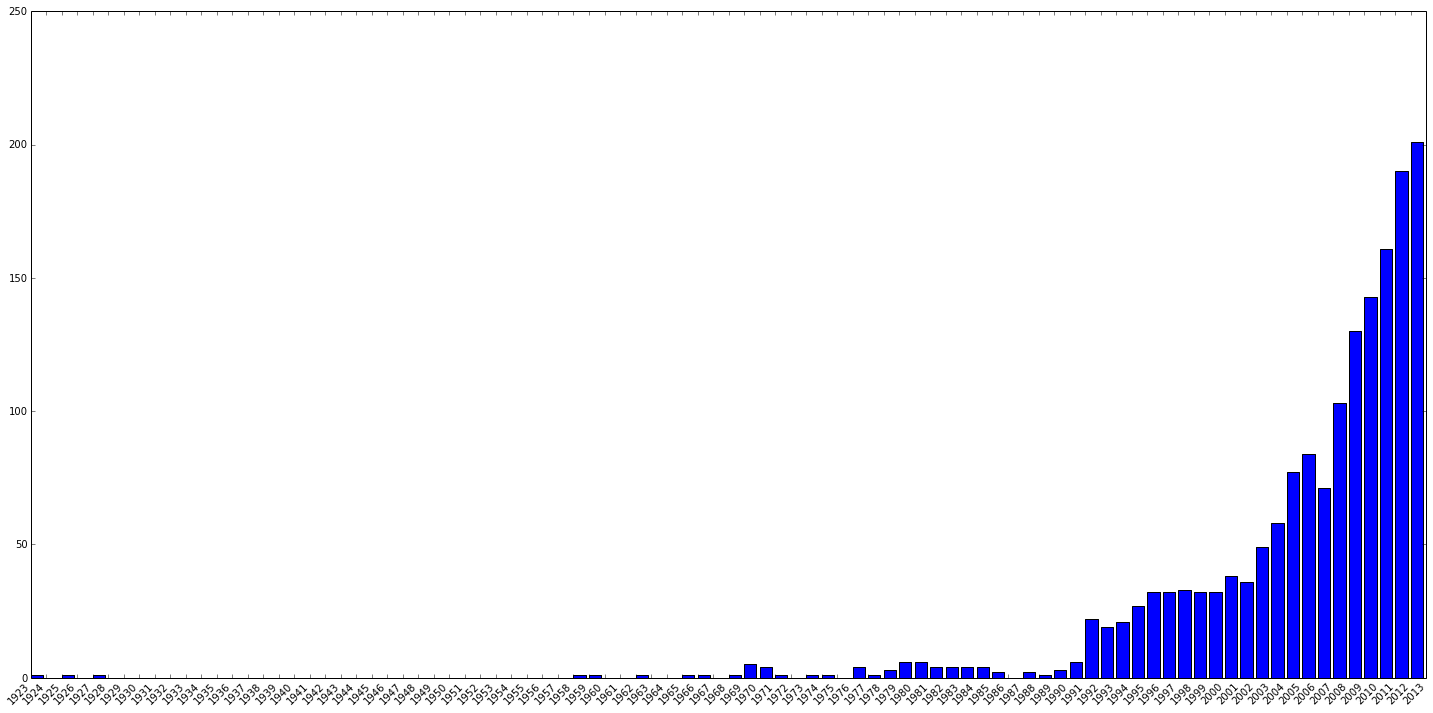

In [7]:
fig = MyCorpus.plot_distribution('date')

You can change how ``slice`` divides up your corpus temporally using the ``method``, ``window_size``, ``step_size``, and ``cumulative`` keyword arguments.

Here are some methods for slicing a Corpus, which you can specify using the ``method`` keyword argument.

| Method           | Description
| -----------------| --------------------------------------------------------------------------------------------------------- |
| ``time_window``  | Slices data using a sliding time-window. Dataslices are indexed by the start of the time-window.          |
| ``time_period``  | Slices data into time periods of equal length. Dataslices are indexed by the start of the time period.    |

The main difference between the sliding time-window (``time_window``) and the time-period (``time_period``) slicing methods are whether the resulting periods can overlap. Whereas time-period slicing divides data into subsets by sequential non-overlapping time periods, subsets generated by time-window slicing can overlap.

**Time-period slicing, with a window-size of 4 years:**
![Time-period slicing, with a window-size of 4 years.](http://diging.github.io/tethne/doc/0.6.1-beta/_images/timeline.timeslice.png)

**Time-window slicing, with a window-size of 4 years and a step-size of 1 year:**
![Time-window slicing, with a window-size of 4 years and a step-size of 1 year.](http://diging.github.io/tethne/doc/0.6.1-beta/_images/timeline.timewindow.png)

Here's what ``plot_distribution`` looks like using a sliding time-window of 4 years:

In [10]:
MyCorpus.slice('date', method='time_window', window_size=4)

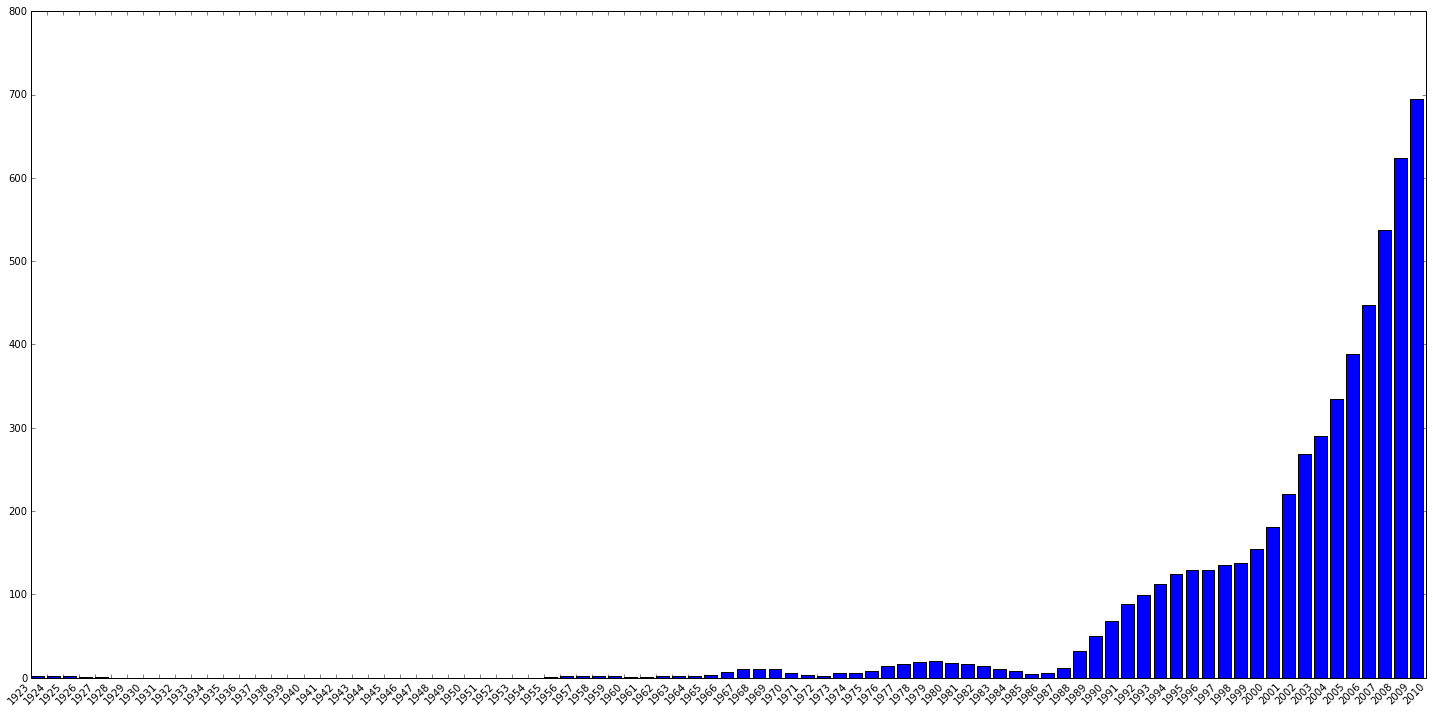

In [11]:
fig = MyCorpus.plot_distribution('date')

Note that it's a bit smoother, and the per-slice counts are much higher over all (max of ~700/slice, versus ~200/slice before).

Setting ``cumulative=True`` means that all of the ``Paper``s in the slice at time 0 will be included in the slice at time 1, and so on.

In [12]:
MyCorpus.slice('date', cumulative=True)

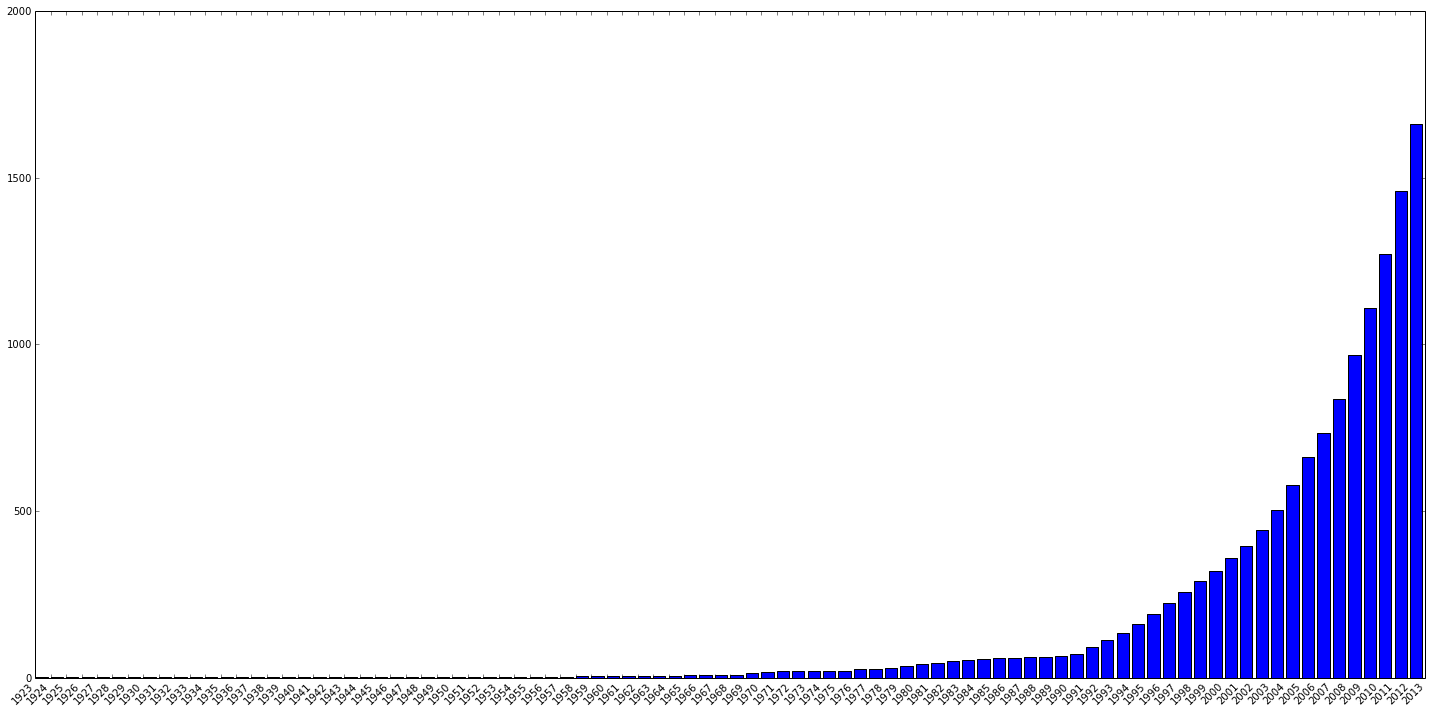

In [13]:
fig = MyCorpus.plot_distribution('date')

## Features over time

Before we get to the stage of networking, we can visualize how certain features are distributed in our ``Corpus``. We'll develop the concept of features further along in these tutorials.

In Tethne, a **feature** is anything (a categorical variable, scalar, etc) that can be distributed over ``Paper``s. A cited reference, for example, can be a feature. So can a word. We can think of features in terms of the presence or absence of something (e.g. a cited reference), or in terms of a quantity (e.g. the number of times the word 'organism' appears in a ``Paper``).

A **featureset** is, as the name suggests, a collection of similar features. For example, we can think of all of the cited references in our ``Corpus`` as a featureset. A vocabulary of words can also be a featureset.

Each ``Corpus`` has an attribute called ``features`` that holds featuresets. It's a dictionary, so you can see what featuresets your ``Corpus`` contains by calling ``Corpus.features.keys``:

In [14]:
MyCorpus.features.keys()

['citations']

So far our ``Corpus`` contains only a featureset called citations. Each featureset has an index of features that it contains.

In [15]:
print 'There are {0} cited references in this Corpus.'.format(len(MyCorpus.features['citations']['index']))
MyCorpus.features['citations']['index'].items()[0:10]  # Only viewing the first 10 items, since there are so many.

There are 57774 cited references in this Corpus.


[(0, 'ALEXANDER RR 1971 U S FOREST SERVICE RESEARCH NOTE RM'),
 (1, 'ALEXANDER RR 1984 RM254 ROCK MOUNT FOR'),
 (2, 'ALEXANDER RR 1990 SILVICS N AM'),
 (3, 'BANSAL S 2010 PLANT ECOL'),
 (4, 'BANSAL S 2008 OECOLOGIA'),
 (5, 'BRUBAKER LB 1986 PLANT ECOL'),
 (6, 'CHRISTY EJ 1984 J ECOL'),
 (7, 'CIERJACKS A 2007 J TROP ECOL'),
 (8, 'CUEVAS JG 2000 J ECOL'),
 (9, 'CUI M 1991 TREE PHYSIOL')]

We can view the distribution of a feature across the slices in our ``Corpus`` using ``plot_distribution``. This is a bit more complicated than before. We first create a dictionary that describes the feature we're interested in, and then we pass it and the ``mode='features'`` keyword argument to ``plot_distribution``.

In [17]:
fkwargs = {
    'featureset': 'citations',
    'feature': 'FALCONER DS 1996 INTRO QUANTITATIVE G',   # An infamous textbook on quant-gen!
    'mode': 'counts',  # The frequency of the citation in each slice.
    'normed': True,    # Normalized by the number of papers in each slice.
}

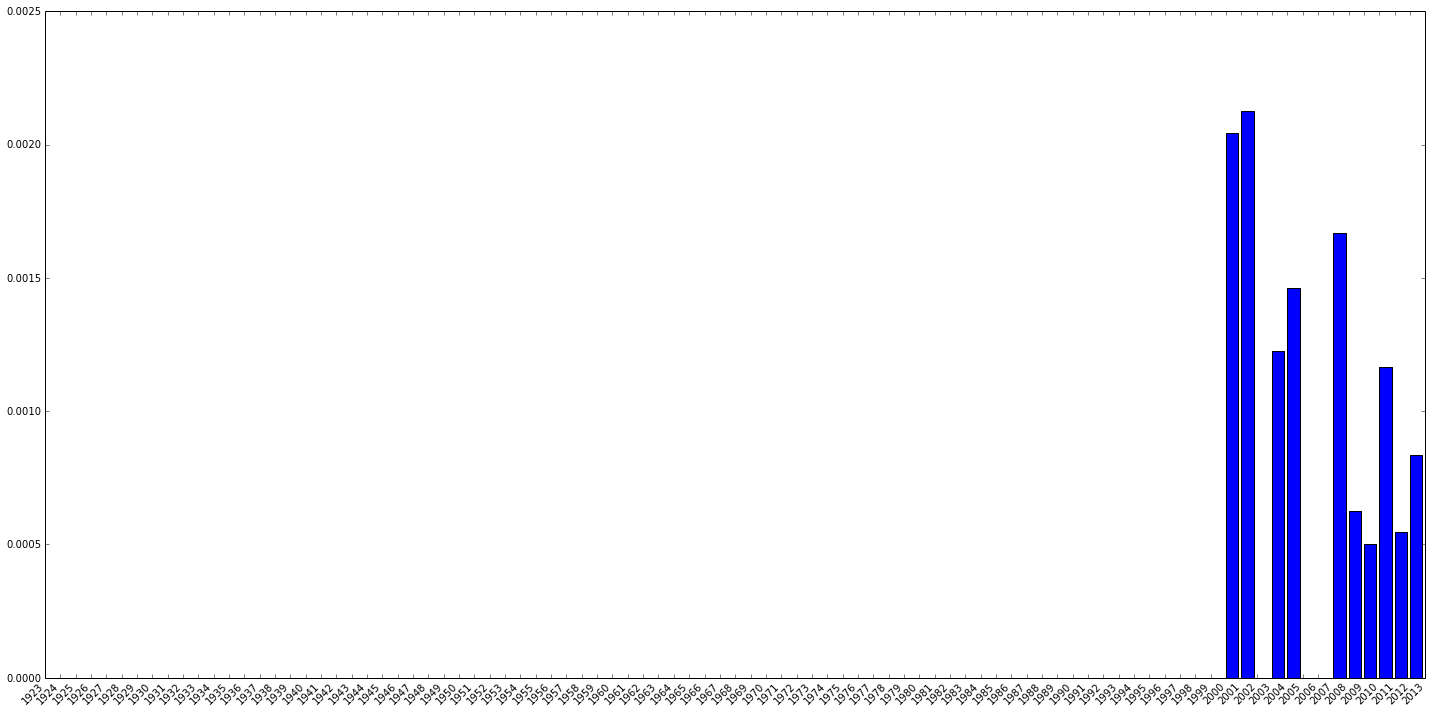

In [18]:
MyCorpus.slice('date')    # We'll go back to 1-year time-period slicing for now.
fig = MyCorpus.plot_distribution('date', mode='features', fkwargs=fkwargs)

## Features across journals

We can also slice our ``Corpus`` using other elements of our data, such as journal names. To slice by journal name, try:

In [19]:
MyCorpus.slice('jtitle')    # jtitle stands for 'journal title'

We can use ``plot_distribution`` took look at the distribution of ``Paper``s across journals. In this example I use [MatPlotLib](http://matplotlib.org/)'s ``pyplot`` module to control the layout of the figure (it's pretty huge).

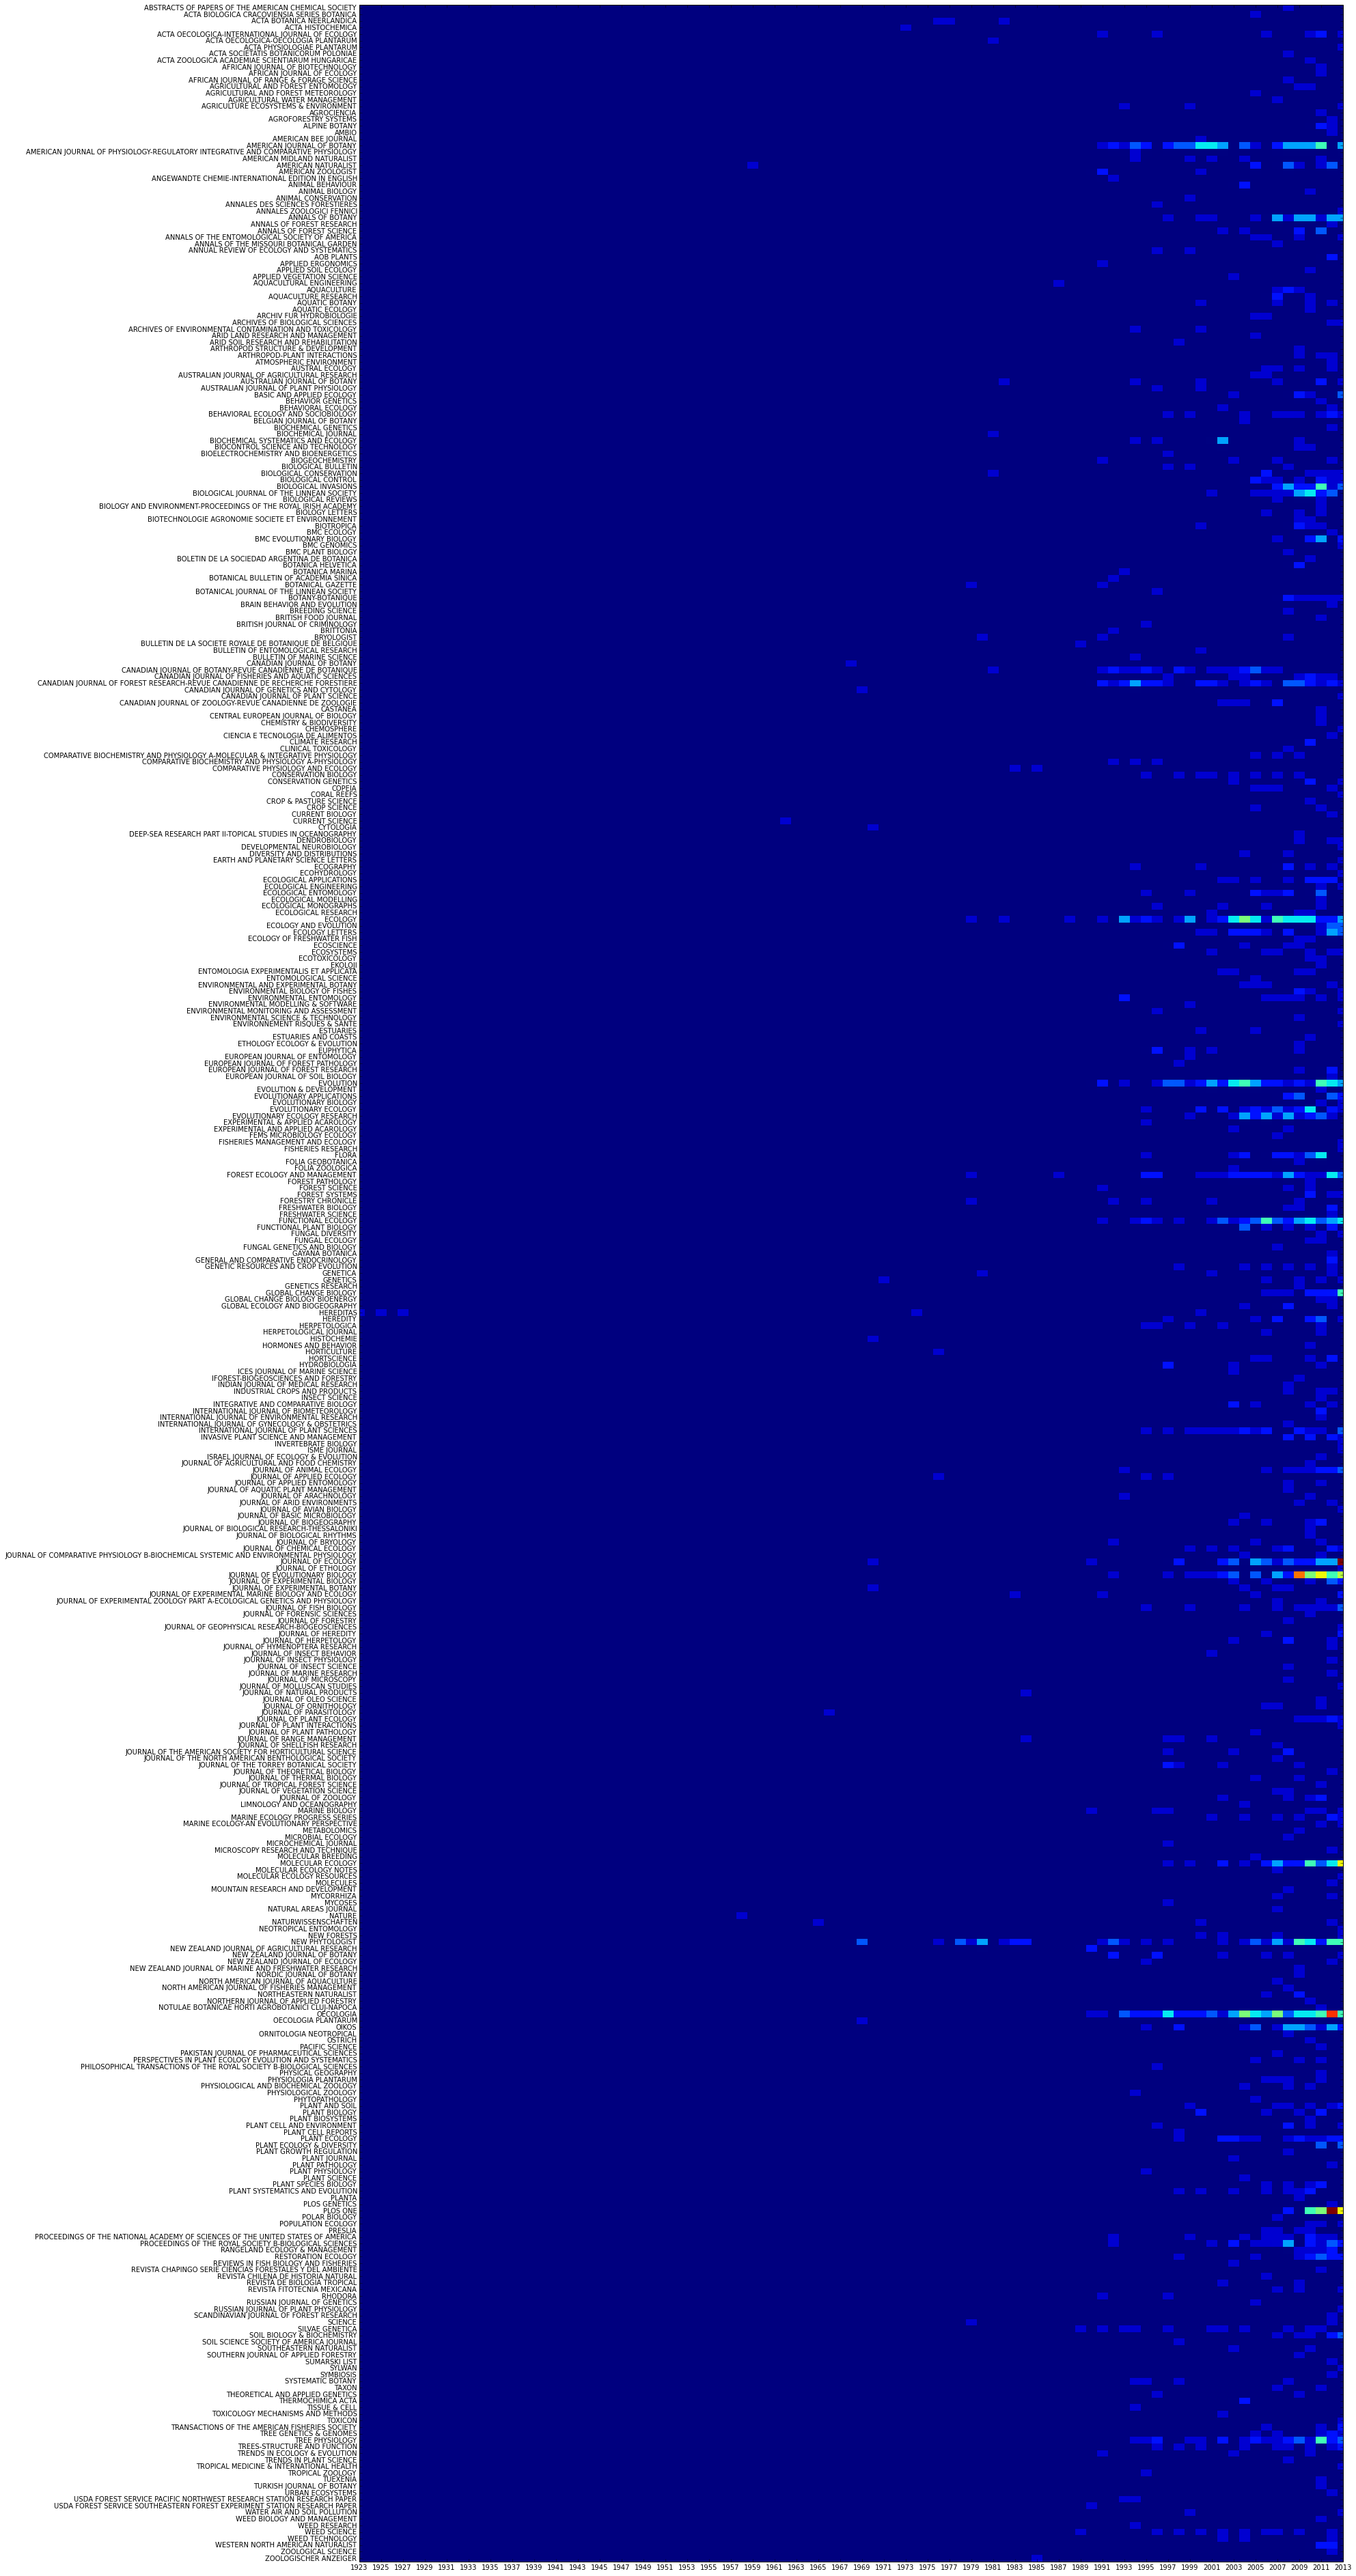

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,145))
fig = MyCorpus.plot_distribution(y_axis='jtitle', fig=fig, aspect=0.6, interpolation='none')

And we can view the distribution of a feature, like citations of Falconer's Quantitative Genetics textbook, across journals in a similar way:

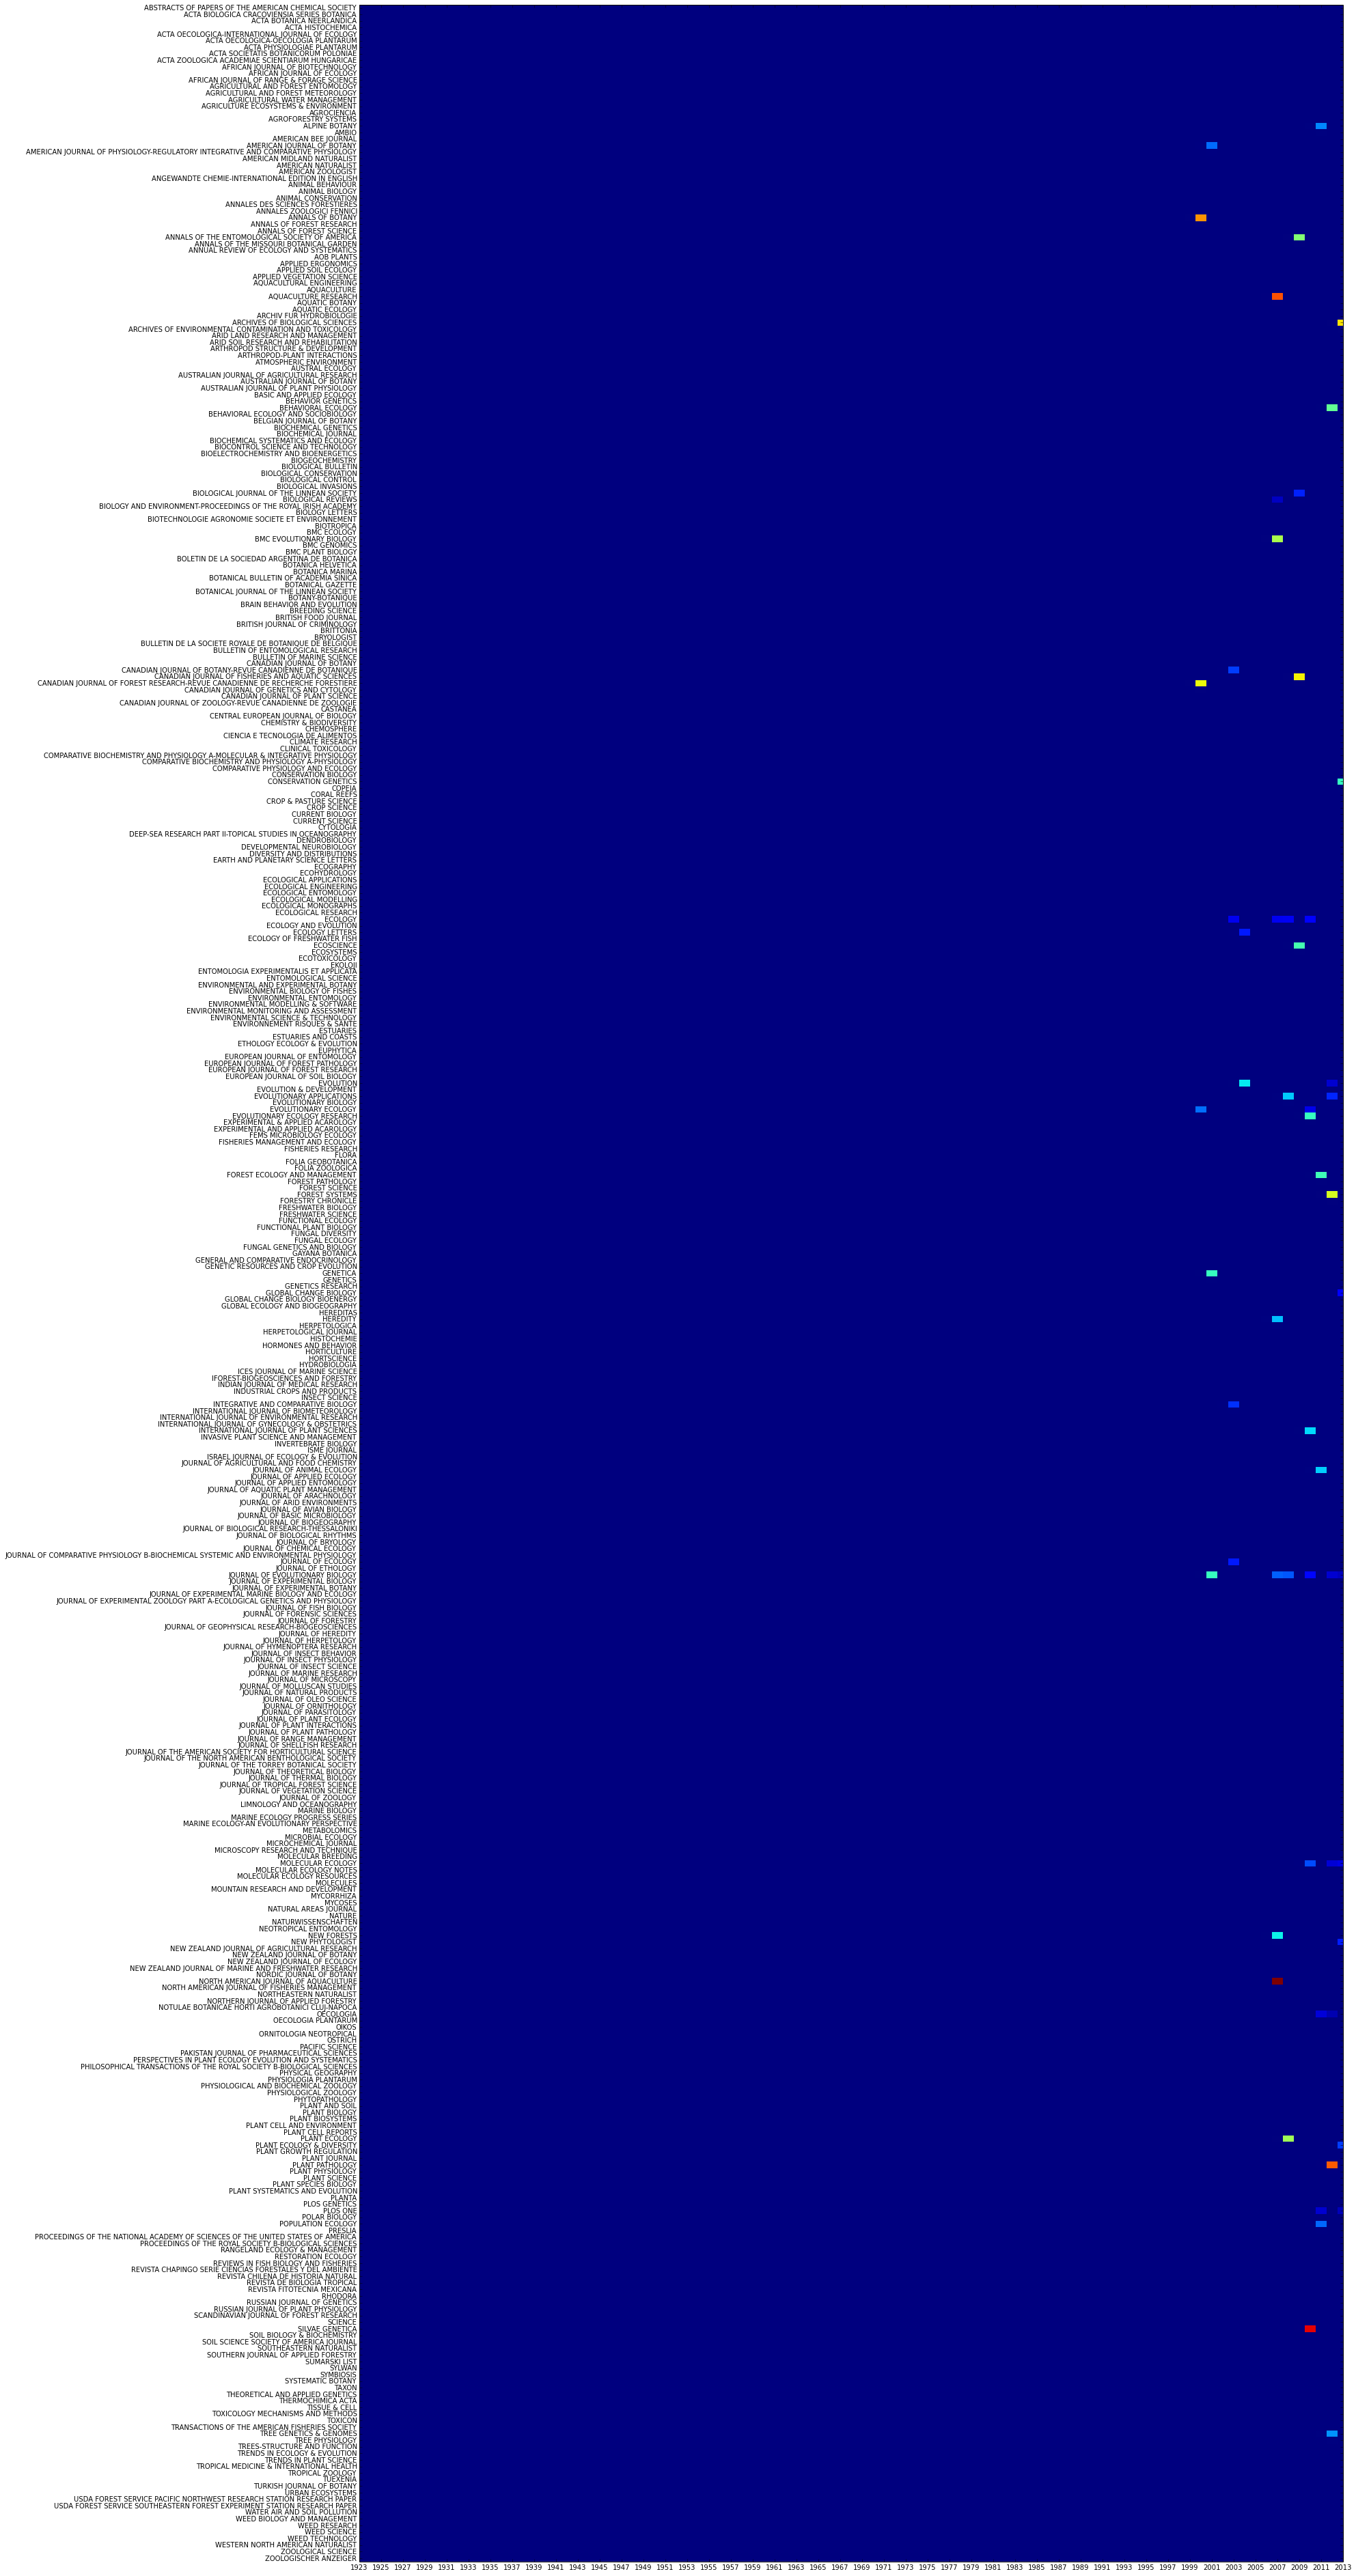

In [17]:
fig = plt.figure(figsize=(50,145))
fig = MyCorpus.plot_distribution(y_axis='jtitle', fig=fig, aspect=0.6, interpolation='none', mode='features', fkwargs=fkwargs)

Of course, these figures are enormous and not very informative as is. The idea is that you can use this as a starting point for your analysis, and ultimately generate your own plots.